In [1]:
!pip install spicy

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association


%matplotlib inline

In [9]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
#PART 1.
#QUESTION 1:

In [11]:
crosstab=pd.crosstab(df["category"], df["isBestSeller"], margins=True)
crosstab

isBestSeller,False,True,All
category,,,
3D Printers,247,1,248
3D Printing & Scanning,4065,2,4067
Abrasive & Finishing Products,245,5,250
Action Cameras,1696,1,1697
Adapters,251,3,254
...,...,...,...
Window Treatments,234,5,239
Women,17559,213,17772
Women's Sports & Outdoor Shoes,1939,20,1959


In [13]:
best_seller_proportion = crosstab.loc[:, 1] / crosstab['All']
sorted_proportions = best_seller_proportion.sort_values(ascending=False)

sorted_proportions

category
Grocery                                    0.058135
Smart Home Security & Lighting             0.057692
Health & Personal Care                     0.057686
Mobile Phone Accessories                   0.042471
Power & Hand Tools                         0.035339
                                             ...   
Snowboard Boots                            0.000000
Internal TV Tuner & Video Capture Cards    0.000000
Boxes & Organisers                         0.000000
Graphics Cards                             0.000000
General Music-Making Accessories           0.000000
Length: 297, dtype: float64

In [ ]:
#QUESTION 2:

In [14]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print(f"chi2 statistisc: {chi2}")
print(f"p-value: {p}")
print(f"Degree of freedom: {dof}")

chi2 statistisc: 36540.202700613874
p-value: 0.0
Degree of freedom: 592


In [15]:
association(crosstab, method="cramer")

0.04323354945446208

In [18]:
#QUESTION 3:

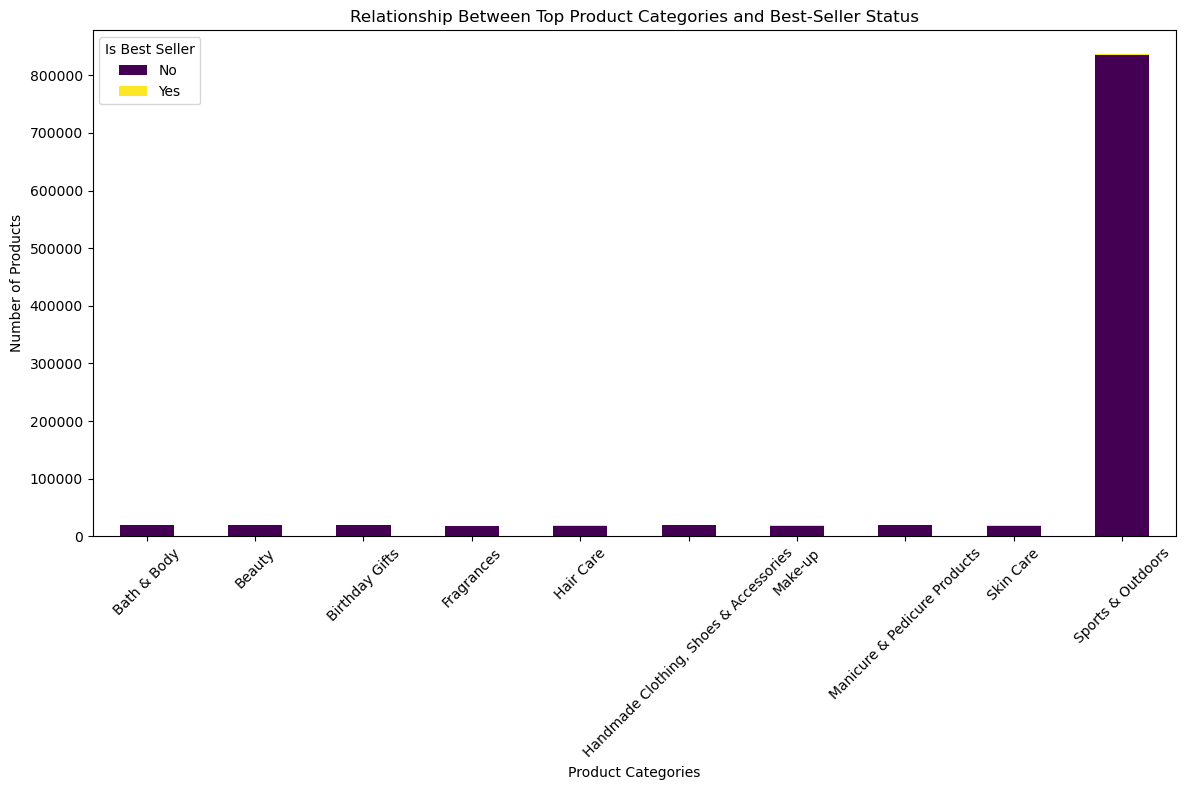

In [25]:
category_totals = df['category'].value_counts()
top_categories = category_totals.head(10).index
filtered_df = df[df['category'].isin(top_categories)]
crosstab_result = pd.crosstab(filtered_data['category'], filtered_data['isBestSeller'])

crosstab_result.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Relationship Between Top Product Categories and Best-Seller Status')
plt.xlabel('Product Categories')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)  
plt.legend(title='Is Best Seller', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

In [26]:
#PART 2:
#QUESTION 0:

In [42]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

print(f"Original data size: {df.shape[0]}")
print(f"Filtered data size: {filtered_df.shape[0]}")

Original data size: 2443651
Filtered data size: 2115963


In [43]:
#QUESTION 1:

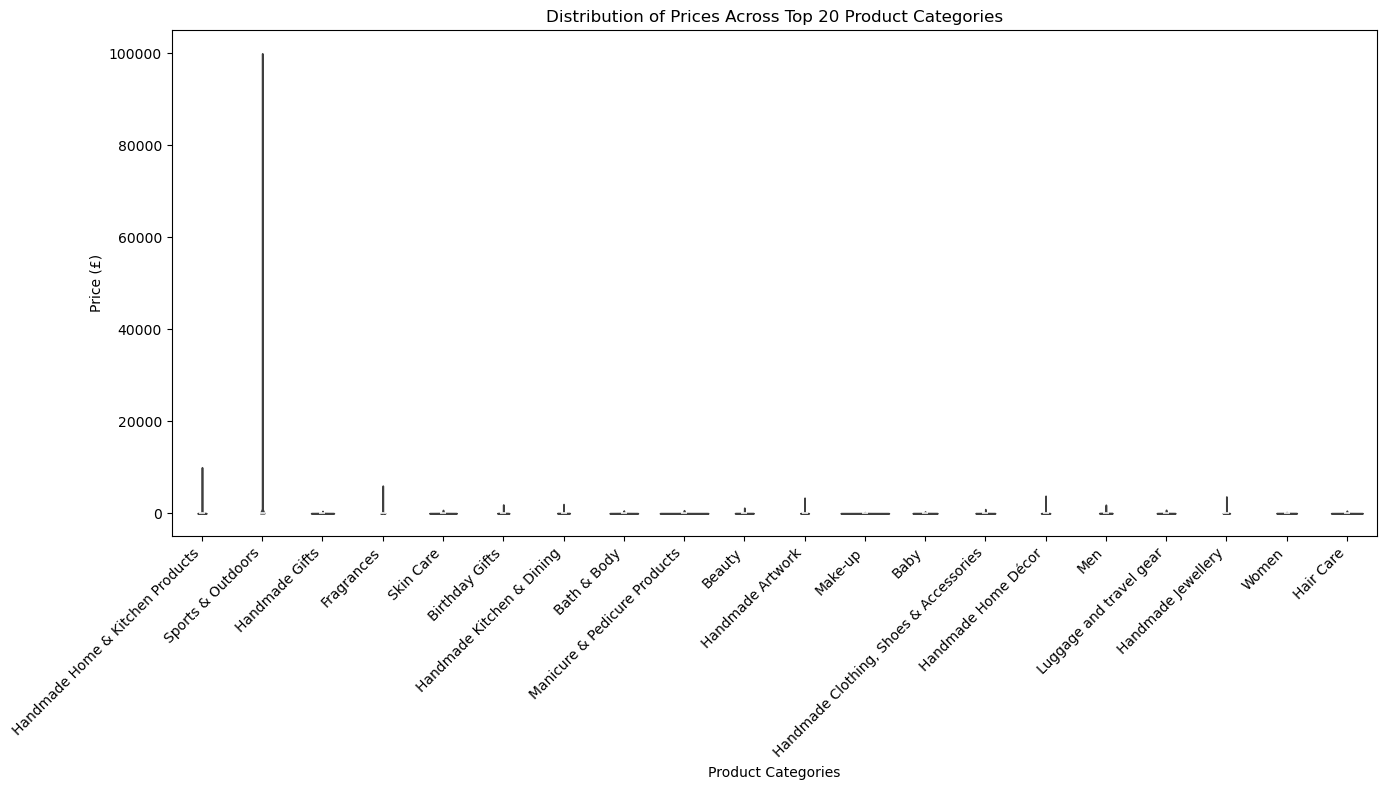

In [52]:
top_categories = df['category'].value_counts().head(20).index
filtered_data = df[df['category'].isin(top_categories)]

plt.figure(figsize=(14, 8))
sns.violinplot(x='category', y='price', data=filtered_data, cut=0)
plt.title('Distribution of Prices Across Top 20 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Price (£)')
plt.xticks(rotation=45, ha='right')  # Rotate for better readability
plt.tight_layout()
plt.show()

In [45]:
median_prices = df.groupby('category')['price'].median()

highest_median_category = median_prices.idxmax()
highest_median_price = median_prices.max()

print(f"Category with the highest median price: {highest_median_category}")
print(f"Highest median price: £{highest_median_price:.2f}")

Category with the highest median price: Laptops
Highest median price: £1042.72


In [54]:
#QUESTION 2:

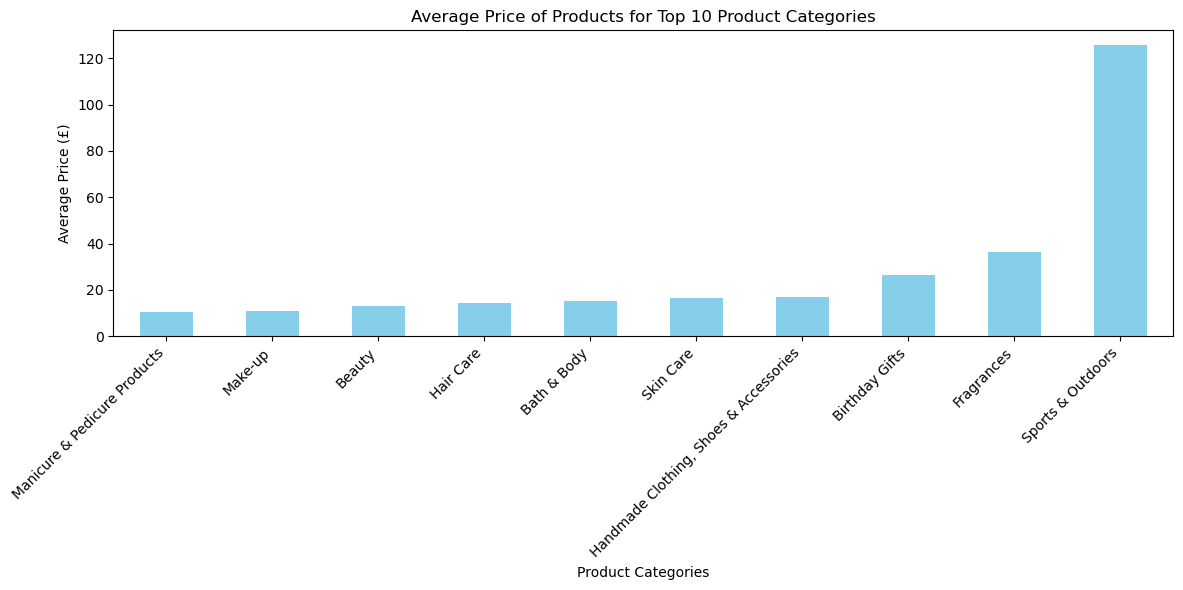

In [56]:
top_categories = df['category'].value_counts().head(10).index
filtered_data = df[df['category'].isin(top_categories)]
average_prices = filtered_data.groupby('category')['price'].mean()

plt.figure(figsize=(12, 6))
average_prices.sort_values().plot(kind='bar', color='skyblue')
plt.title('Average Price of Products for Top 10 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [39]:
highest_avg_price_category = average_prices.idxmax()
highest_avg_price = average_prices.max()

print(f"Category with the highest average price: {highest_avg_price_category}")
print(f"Highest average price: £{highest_avg_price:.2f}")

Category with the highest average price: Sports & Outdoors
Highest average price: £125.77


In [40]:
#QUESTION 3:

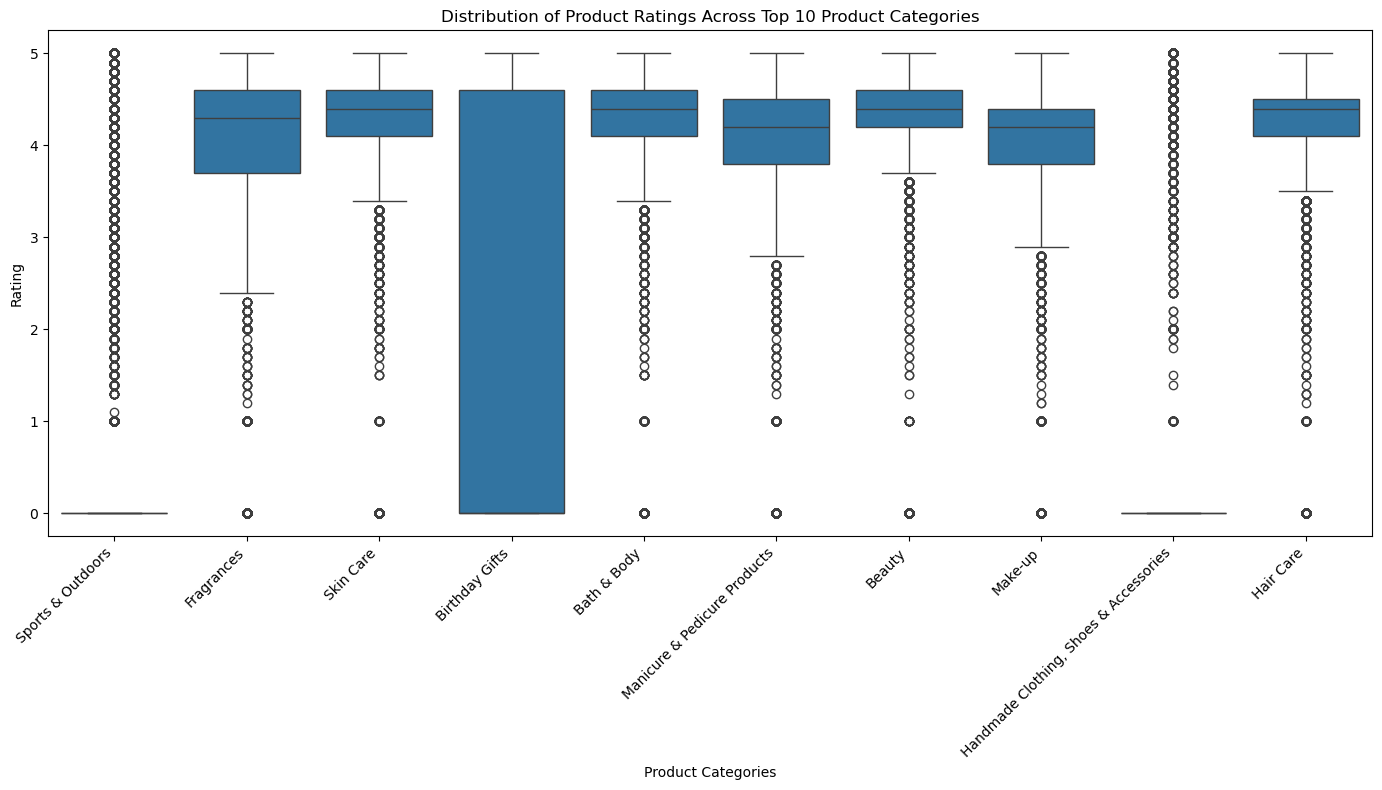

In [60]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='category', y='stars', data=filtered_data)
plt.title('Distribution of Product Ratings Across Top 10 Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [63]:
median_ratings = df.groupby('category')['stars'].median()
highest_median_rating_category = median_ratings.idxmax()
highest_median_rating = median_ratings.max()

print(f"Category with the highest median rating: {highest_median_rating_category}")
print(f"Highest median rating: {highest_median_rating:.2f}")

Category with the highest median rating: Computer Memory
Highest median rating: 4.70


In [64]:
#PART 3.
#QUESTION 1:

In [67]:
data_cleaned = df[['price', 'stars']].dropna()
correlation_coefficient = data_cleaned['price'].corr(data_cleaned['stars'])

print(f"Correlation coefficient between price and rating: {correlation_coefficient:.2f}")

Correlation coefficient between price and rating: -0.12


This result -0.12 indicates that there is a weak negative correlation between product price and its stars/rating

In [68]:
#QUESTION 2:

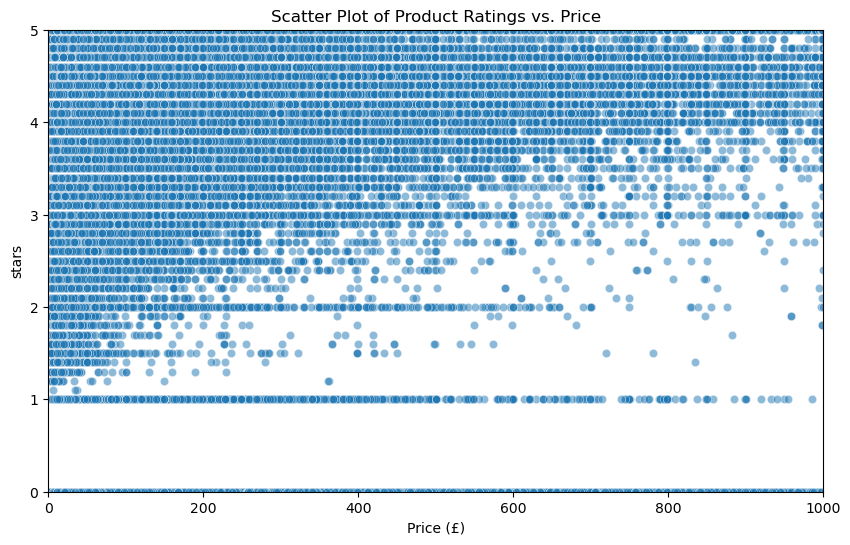

In [70]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='stars', data=df, alpha=0.5)
plt.title('Scatter Plot of Product Ratings vs. Price')
plt.xlabel('Price (£)')
plt.ylabel('stars')
plt.xlim(0, 1000)  
plt.ylim(0, 5)  
plt.show()

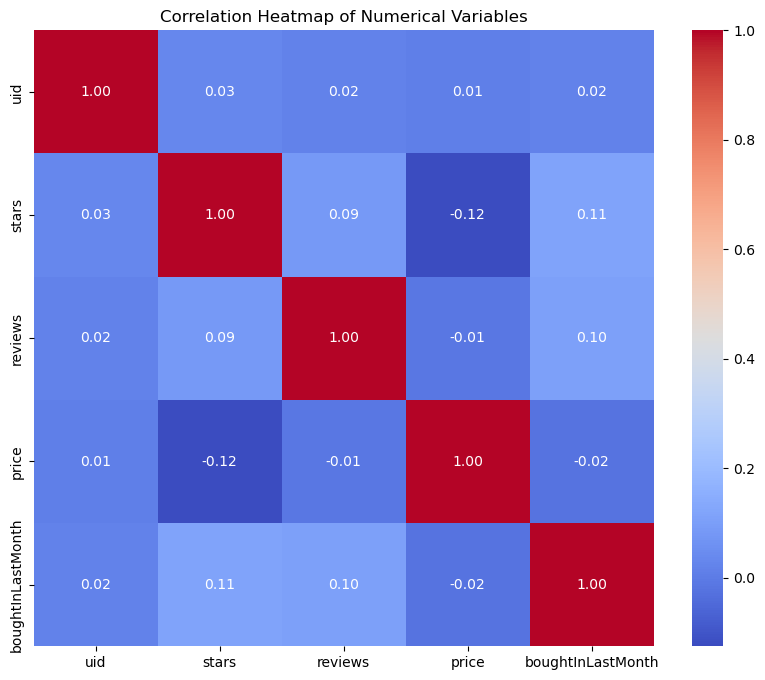

In [74]:
df_numerical=df.select_dtypes("number")
corr_matrix = df_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

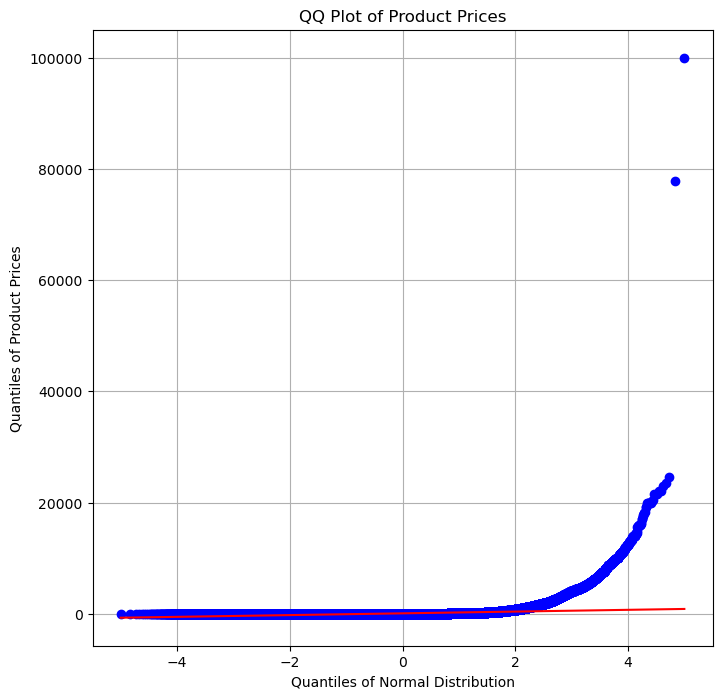

In [75]:
plt.figure(figsize=(8, 8))
stats.probplot(df['price'], dist="norm", plot=plt)
plt.title('QQ Plot of Product Prices')
plt.ylabel('Quantiles of Product Prices')
plt.xlabel('Quantiles of Normal Distribution')
plt.grid(True)
plt.show()